In [45]:
import pandas as pd

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
df = pd.read_csv('reviews.csv')

In [48]:
df.head()

,ProductID,ReviewID,Review
0,HT-1000,100000000,Three start. I have some issues like some keys...
1,HT-1001,100000001,Heating and not wake up. Check twice when buy ...
2,HT-1002,100000002,2nd hand laptops!!! The laptop I received alre...
3,HT-1003,100000003,Review: BEST LAPTOP IN A PRICE SEGMENT OF Rs 5...
4,HT-1010,100000004,Review: second hand product. don't buy this. I...


### step 1:
Converting raw text into a TF-IDF matrix.

In [49]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['Review'])


In [50]:
print(x.toarray())
x.shape

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.25836133 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


(85, 537)

In [51]:
df_data = pd.DataFrame(x.toarray(), columns= vectorizer.get_feature_names_out())
df_data.head()

,10,2017,2nd,50k,55,55k,60k,90,able,abnormal,...,works,world,worst,worth,worthy,would,wrking,yes,you,your
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.258361,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.420583,0.0,0.420583,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 2:
Computing sentiment score for each review and creating a feature from the score.

In [52]:
from textblob import TextBlob

In [53]:
df['sentiment'] = df['Review'].apply(lambda review: TextBlob(review).sentiment.polarity)

In [54]:
df.head()

,ProductID,ReviewID,Review,sentiment
0,HT-1000,100000000,Three start. I have some issues like some keys...,-0.025000
1,HT-1001,100000001,Heating and not wake up. Check twice when buy ...,0.000000
2,HT-1002,100000002,2nd hand laptops!!! The laptop I received alre...,-0.042614
3,HT-1003,100000003,Review: BEST LAPTOP IN A PRICE SEGMENT OF Rs 5...,1.000000
4,HT-1010,100000004,Review: second hand product. don't buy this. I...,0.000000


In [55]:
print(df.groupby('sentiment').first())

          ProductID   ReviewID  \
sentiment                        
-1.0000     HT-1007  100000027   
-0.9550     HT-1020  100000005   
-0.7000     HT-1030  100000016   
-0.7000     HT-1010  100000014   
-0.6350     HT-1001  100000021   
...             ...        ...   
 0.8275     HT-1010  100000024   
 0.8500     HT-1050  100000044   
 0.8700     HT-1007  100000042   
 0.9000     HT-1000  100000020   
 1.0000     HT-1003  100000003   

                                                      Review  
sentiment                                                     
-1.0000    Review: Worst laptop ever not for student use ...  
-0.9550    Review: very bad. My product is not working wh...  
-0.7000    Review: It’s been just 2 months and the device...  
-0.7000    Review:  have had extremely bad experiences wi...  
-0.6350    Review: very poor. disappointed. Defective pro...  
...                                                      ...  
 0.8275    Review: Very good and light weight laptop.

In [56]:
sentiment_result = []
for i in range(len(df['sentiment'])):
    if (df['sentiment'][i]>=-1) & (df['sentiment'][i]<=-0.8):
        sentiment_result.append('Terrible')
    elif (df['sentiment'][i]>-0.8) & (df['sentiment'][i]<=-0.3):
        sentiment_result.append('Bad')
    elif (df['sentiment'][i]>-0.3) & (df['sentiment'][i]<=0.3):
        sentiment_result.append('Neutral')
    elif (df['sentiment'][i]>0.3) & (df['sentiment'][i]<0.8):
        sentiment_result.append('Good')
    elif (df['sentiment'][i]>=0.8) & (df['sentiment'][i]<=1):
        sentiment_result.append('Excellent')

df['sentiment_result'] = sentiment_result

In [57]:
df

,ProductID,ReviewID,Review,sentiment,sentiment_result
0,HT-1000,100000000,Three start. I have some issues like some keys...,-0.025000,Neutral
1,HT-1001,100000001,Heating and not wake up. Check twice when buy ...,0.000000,Neutral
2,HT-1002,100000002,2nd hand laptops!!! The laptop I received alre...,-0.042614,Neutral
3,HT-1003,100000003,Review: BEST LAPTOP IN A PRICE SEGMENT OF Rs 5...,1.000000,Excellent
4,HT-1010,100000004,Review: second hand product. don't buy this. I...,0.000000,Neutral
...,...,...,...,...,...
80,HT-1020,100000035,Review: Good product. But we are not getting o...,0.700000,Good
81,HT-1030,100000036,Review: Finally a MacBook possession. Worth ev...,0.150000,Neutral
82,HT-1007,100000037,Review: Really good is and it is very smooth e...,0.673333,Good
83,HT-1040,100000038,Review: Amazing product by Apple and great del...,0.700000,Good


### step 3:
Creating features based on the presence of specific n-grams that are hypothesized to be strong indicators of positive or negative sentiment.

In [58]:
df['Review']

0     Three start. I have some issues like some keys...
1     Heating and not wake up. Check twice when buy ...
2     2nd hand laptops!!! The laptop I received alre...
3     Review: BEST LAPTOP IN A PRICE SEGMENT OF Rs 5...
4     Review: second hand product. don't buy this. I...
                            ...                        
80    Review: Good product. But we are not getting o...
81    Review: Finally a MacBook possession. Worth ev...
82    Review: Really good is and it is very smooth e...
83    Review: Amazing product by Apple and great del...
84    Review: Excellent product and good delivery tu...
Name: Review, Length: 85, dtype: object

In [59]:
from nltk import ngrams
data = df['Review']
n = 1
count_words=[]
for i in range(len(df['Review'])):
    unigrams = ngrams(df['Review'][i].split(' '), n)
    words_list=[]
    for grams in unigrams:
        #print(grams)
        words_list.append(grams)
        #print(words_list)
    l = len(words_list)
    count_words.append(l)    
    
    

df['word_count'] = count_words

In [61]:
df.describe()

,ReviewID,sentiment,word_count
count,8.500000e+01,85.000000,85.000000
mean,1.000000e+08,0.193779,19.270588
std,1.246536e+01,0.483322,12.418677
min,1.000000e+08,-1.000000,6.000000
25%,1.000000e+08,-0.175000,12.000000
50%,1.000000e+08,0.216667,17.000000
75%,1.000000e+08,0.520833,23.000000
max,1.000000e+08,1.000000,89.000000


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

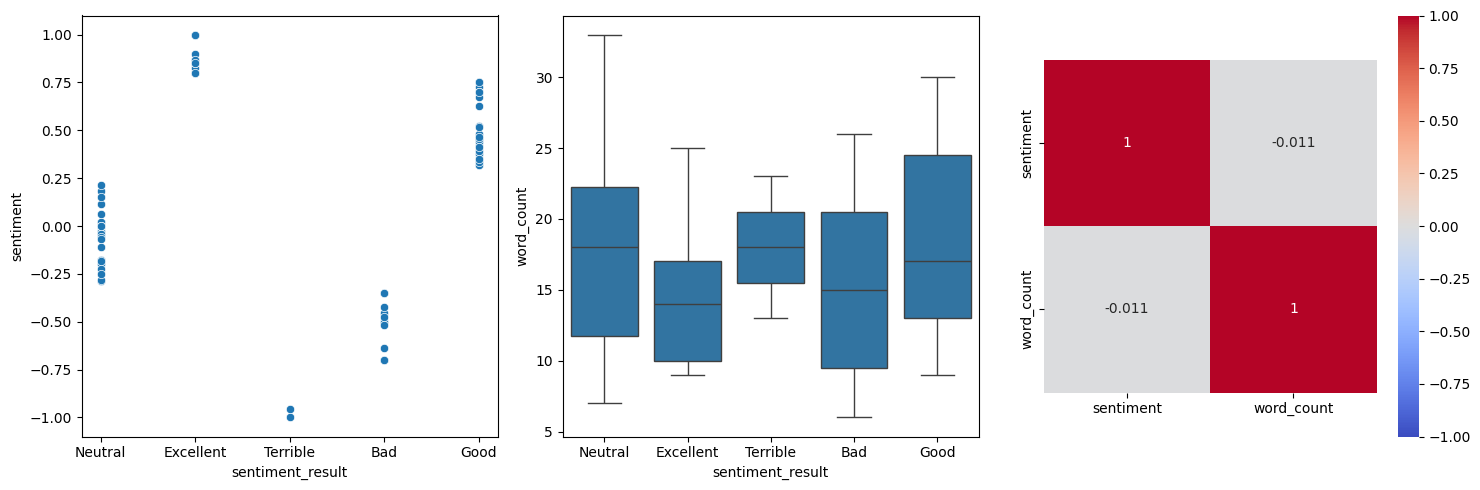

In [68]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
q1 = df['word_count'].quantile(0.25)
q3 = df['word_count'].quantile(0.75)
IQR= q3-q1
lower_bound = q1-1.5*IQR
upper_bound = q3+1.5*IQR
df_clean = df[(df['word_count']>=lower_bound)&(df['word_count']<=upper_bound)]
df_clean.reset_index(inplace=True, drop=True)

sns.scatterplot(data=df_clean, x= 'sentiment_result', y='sentiment', ax= axes[0])
sns.boxplot(data= df_clean, x = 'sentiment_result', y = 'word_count', ax= axes[1])
sns.heatmap(data= df_clean[['sentiment', 'word_count']].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True, ax= axes[2])

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

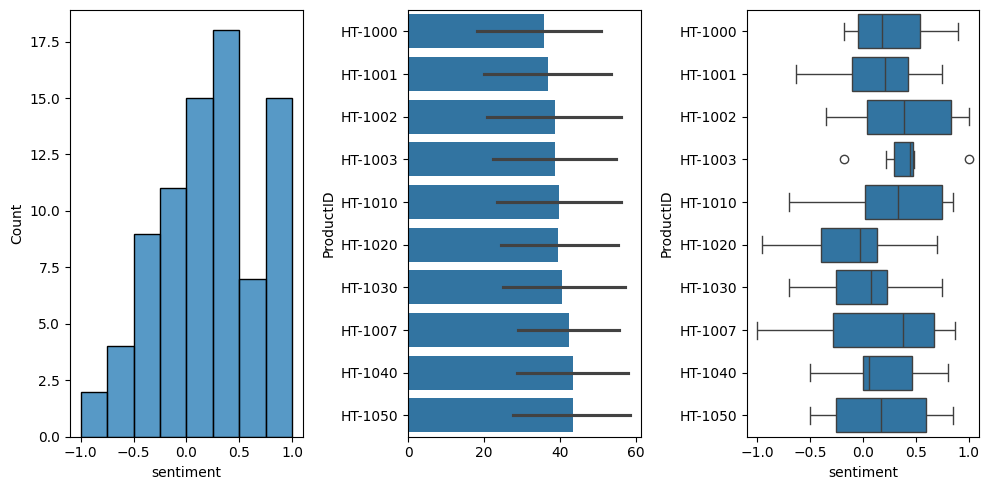

In [84]:
fig, axes = plt.subplots(1,3, figsize = (10,5))

sns.histplot(data= df_clean['sentiment'], ax= axes[0])
sns.barplot(data= df_clean['ProductID'],ax= axes[1])
sns.boxplot(data= df_clean, x = 'sentiment', y = 'ProductID', ax= axes[2])

#sns.heatmap(data= df[['sentiment', 'word_count']].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True, ax= axes[1])

plt.tight_layout()
plt.show

In [65]:
from nltk import ngrams
data = df['Review']
n = 2
for i in range(len(df['Review'])):
    bigrams = ngrams(df['Review'][i].split(' '), n)
    for grams in bigrams:
        print(grams)

('Three', 'start.')
('start.', 'I')
('I', 'have')
('have', 'some')
('some', 'issues')
('issues', 'like')
('like', 'some')
('some', 'keys')
('keys', "don't")
("don't", 'work')
('work', 'on')
('on', 'first')
('first', 'instance..and')
('instance..and', 'is')
('is', 'somewhat')
('somewhat', 'slow')
('slow', 'also')
('Heating', 'and')
('and', 'not')
('not', 'wake')
('wake', 'up.')
('up.', 'Check')
('Check', 'twice')
('twice', 'when')
('when', 'buy')
('buy', 'it')
('it', 'on')
('on', 'Offer.')
('2nd', 'hand')
('hand', 'laptops!!!')
('laptops!!!', 'The')
('The', 'laptop')
('laptop', 'I')
('I', 'received')
('received', 'already')
('already', 'had')
('had', 'an')
('an', 'user')
('user', 'on')
('on', 'it')
('it', 'with')
('with', 'password')
('password', 'etc.')
('etc.', 'These')
('These', 'are')
('are', 'not')
('not', 'new')
('new', 'laptops!')
('Review:', 'BEST')
('BEST', 'LAPTOP')
('LAPTOP', 'IN')
('IN', 'A')
('A', 'PRICE')
('PRICE', 'SEGMENT')
('SEGMENT', 'OF')
('OF', 'Rs')
('Rs', '55-60K.'

In [66]:
data = df['Review']
def ngrams(input):
    n= len(df['Review'])
    for i in range(n):
        var = input[i].split(' ')
        #print(var)
        output = []
        for j in range(len(var)+1):
            #output.append(var[j:])
            #print(output)
            g = ' '.join(var[j:j+1])
            output.setdefault(g, 0)
            output[g] += 1
        return output
    

ngrams(data)

AttributeError: 'list' object has no attribute 'setdefault'